In [1]:
#2-4-1 neural network
import numpy as np
x = np.array([[0.25],
              [0.30]]) # input (2)
y = np.array([0.12]) # output (1)
a0 = x
 
W1 = np.array([[0.15, 0.20],
               [0.25, 0.30],
               [0.35, 0.40],
               [0.45, 0.50]]) #Added this
b1 = np.array([[0.35],
               [0.35],
               [0.35],
               [0.35]]) #Added this

W2 = np.array([[0.40, 0.45, 0.50, 0.55]]) # Added one extra value 
b2 = np.array([[0.60]])
 
 
eta = 0.5

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
 
def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

In [3]:
# Only re-run ONLY this cell to see how the algorithm improves over different passes (epoch(s))
numb_epoch = 100
loss_arr = []
output_arr = []
for i in range(numb_epoch):
    # 1. FORWARD PASS
    z1 = W1 @ x + b1
    a1 = sigmoid(z1)
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)
    
    # 2. CALCULATE LOSS
    error = a2-y
    loss = 0.5 * error.T @ error
    
    # 3. BACKWARD PASS
    delta2 = (a2 - y) * sigmoid_derivative(z2)
    delta1 = (W2.T @ delta2) * sigmoid_derivative(z1)
    
    W2 = W2 - eta * delta2 @ a1.T      
    b2 = b2 - eta * delta2                    
    W1 = W1 - eta * delta1 @ a0.T     
    b1 = b1 - eta * delta1   
    
    loss_arr.append(loss.item())
    output_arr.append(a2.item())
    #print(f'Loss: {loss} & Output: {a2} in epoch {i+1}')



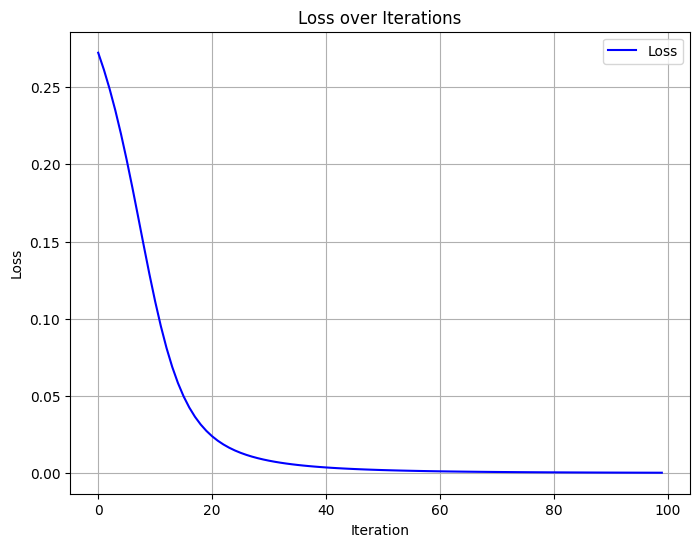

In [4]:
import matplotlib.pyplot as plt

# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(range(numb_epoch), loss_arr, 'b-', label='Loss')
plt.title('Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# 2-4-2 Network


In [5]:
import numpy as np

# Input and target output
x = np.array([[0.25],
              [0.30]])  # Input (2 neurons), shape: (2, 1)
y = np.array([[0.12],
              [0.15]])  # Output (2 neurons), shape: (2, 1)
a0 = x

# Layer 1 (Input to Hidden, 2 -> 4 neurons)
W1 = np.array([[0.15, 0.20],
               [0.25, 0.30],
               [0.35, 0.40],
               [0.45, 0.50]])  # Shape: (4, 2)
b1 = np.array([[0.35],
               [0.35],
               [0.35],
               [0.35]])  # Shape: (4, 1)

# Layer 2 (Hidden to Output, 4 -> 2 neurons)
W2 = np.array([[0.40, 0.45, 0.50, 0.55],
               [0.42, 0.47, 0.52, 0.57]])  # Shape: (2, 4)
b2 = np.array([[0.60],
               [0.62]])  # Shape: (2, 1)

eta = 0.5  # Learning rate

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# Training loop
numb_epoch = 100
loss_arr = []
output_arr = []
for i in range(numb_epoch):
    # 1. FORWARD PASS
    z1 = W1 @ x + b1  
    a1 = sigmoid(z1)  
    z2 = W2 @ a1 + b2  
    a2 = sigmoid(z2)  

    # 2. CALCULATE LOSS
    error = a2 - y  
    loss = 0.5 * np.sum(error * error)  # Scalar loss

    # 3. BACKWARD PASS
    delta2 = error * sigmoid_derivative(z2)  
    delta1 = (W2.T @ delta2) * sigmoid_derivative(z1)  

    # Update weights and biases
    W2 = W2 - eta * delta2 @ a1.T  
    b2 = b2 - eta * delta2  
    W1 = W1 - eta * delta1 @ a0.T 
    b1 = b1 - eta * delta1  

    loss_arr.append(loss.item())
    output_arr.append(a2.flatten())  # Store output as flat array
    print(f'Loss: {loss} & Output: {a2} in epoch {i+1}')

Loss: 0.5289455169979254 & Output: [[0.85802799]
 [0.86638378]] in epoch 1
Loss: 0.5081161322761865 & Output: [[0.84264902]
 [0.85285891]] in epoch 2
Loss: 0.4847545233868667 & Output: [[0.82496972]
 [0.83740581]] in epoch 3
Loss: 0.45872244047952304 & Output: [[0.80471418]
 [0.81978457]] in epoch 4
Loss: 0.42999825656847757 & Output: [[0.78165468]
 [0.79977658]] in epoch 5
Loss: 0.3987377064616882 & Output: [[0.75566619]
 [0.77721919]] in epoch 6
Loss: 0.3653316751652242 & Output: [[0.72679285]
 [0.75205132]] in epoch 7
Loss: 0.330438623360866 & Output: [[0.6953111 ]
 [0.72436433]] in epoch 8
Loss: 0.2949644832154348 & Output: [[0.66176398]
 [0.69444537]] in epoch 9
Loss: 0.25997258008490265 & Output: [[0.62693883]
 [0.66279449]] in epoch 10
Loss: 0.2265338075833649 & Output: [[0.59177673]
 [0.63009825]] in epoch 11
Loss: 0.19556040625513926 & Output: [[0.55723331]
 [0.59715528]] in epoch 12
Loss: 0.16768072732447542 & Output: [[0.52413791]
 [0.56476982]] in epoch 13
Loss: 0.143193304